# Evolutionary algorithm

## 1. Install dependencies

In [2]:
# %pip install numpy pandas matplotlib

## 2. Declaration of functions to optimize

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + 20 + np.e

## 2. Creating algorithm

### 2.1 Useful functions declaration

In [5]:
def calculate_scores(population, function):
    return np.array([function(gen) for gen in population])

In [6]:
def selection(population, fitness_scores):
    inverted_fitness_scores = 1 / (fitness_scores + 1e-6)
    total_fitness = np.sum(inverted_fitness_scores)
    selection_probabilities = inverted_fitness_scores / total_fitness
    
    parents_indices = np.random.choice(np.arange(len(population)), size=len(population), p=selection_probabilities)
    parents = population[parents_indices]
    return parents

In [7]:
def crossover(parents, pc):
    children = np.zeros_like(parents)
    for i in range(len(parents)):
        if np.random.rand() < pc:
            parent1 = parents[np.random.randint(len(parents))]
            parent2 = parents[np.random.randint(len(parents))]
            children[i] = np.array([parent1[0], parent2[1]])
        else:
            children[i] = parents[i]
    return children

In [8]:
def mutate(children, pm, distance=100):
    for i in range(len(children)):
        for j in range(2):
            if np.random.rand() < pm:
                children[i][j] = np.random.uniform(-distance, distance)
    return children

### 2.2 Algorithm implementation

In [91]:
def evolutionary_algorithm(function, base_length=1000, max_iter=1000, pm=0.01, pc=0.7):

    all_populations = []
    all_fitness_scores = []

    population = np.random.uniform(-100, 100, size=(base_length, 2))
    best_solutions = []
    best_scores = []
    mean_scores = []

    solution_check = max_iter // 10

    for i in range(max_iter):
        # Rating individuals
        fitness_scores = calculate_scores(population, function)
        all_populations.append(population)
        all_fitness_scores.append(fitness_scores)

        # Parent selection
        parents = selection(population, fitness_scores)

        # Crossover
        children = crossover(parents, pc)

        # Mutation and succession
        population = mutate(children, pm)
    
        solution = population[np.argmin(calculate_scores(population, function))]
        solution_score = function(solution)
        mean_score = np.mean(calculate_scores(population, function))
        best_solutions.append(solution)
        best_scores.append(solution_score)
        mean_scores.append(mean_score)

        if i % solution_check == 0 and i > 0:
            print(f"Simulating generation {i}. This generation info:")
            print(f"Lowest score: {solution_score}\nBest solution: {solution}")

    return best_solutions, best_scores, mean_scores


## 3. Application on functions

#### Useful functions

In [37]:
def plot_scores(best_scores, mean_scores):
    fig, axs = plt.subplots(2, figsize=(12, 8))
    axs[0].plot(best_scores, color='r')
    axs[1].plot(mean_scores, color='b')
    plt.xlabel('Generations')
    plt.ylabel('Scores')
    axs[0].set_title('Best scores')
    axs[1].set_title('Mean scores')

### 3.1 Himmelblau's function

#### Default parameters

In [92]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.036780711941438976
Best solution: [3.00528063 1.95032798]
Simulating generation 200. This generation info:
Lowest score: 0.036780711941438976
Best solution: [3.00528063 1.95032798]
Simulating generation 300. This generation info:
Lowest score: 0.009128449844126005
Best solution: [3.00528063 2.01885681]
Simulating generation 400. This generation info:
Lowest score: 0.009128449844126005
Best solution: [3.00528063 2.01885681]
Simulating generation 500. This generation info:
Lowest score: 0.009128449844126005
Best solution: [3.00528063 2.01885681]
Simulating generation 600. This generation info:
Lowest score: 0.0020597363476324362
Best solution: [3.00528063 2.00525509]
Simulating generation 700. This generation info:
Lowest score: 0.0020597363476324362
Best solution: [3.00528063 2.00525509]
Simulating generation 800. This generation info:
Lowest score: 0.0020597363476324362
Best solution: [3.00528063 2.00525509]
Simulating ge

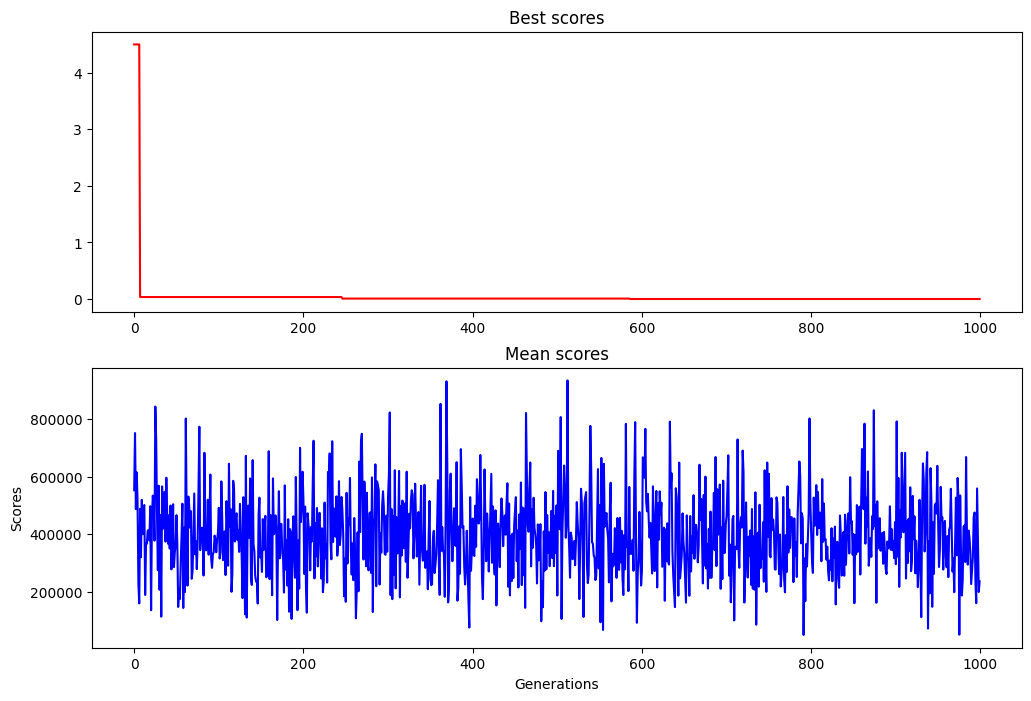

In [93]:
plot_scores(best_scores, mean_scores)

#### Different `base_length`

In [94]:
base_lenght = 100
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 200. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 300. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 400. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 500. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 600. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 700. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 800. This generation info:
Lowest score: 1.4491860983331157
Best solution: [2.82827624 2.26346456]
Simulating generation 900. This 

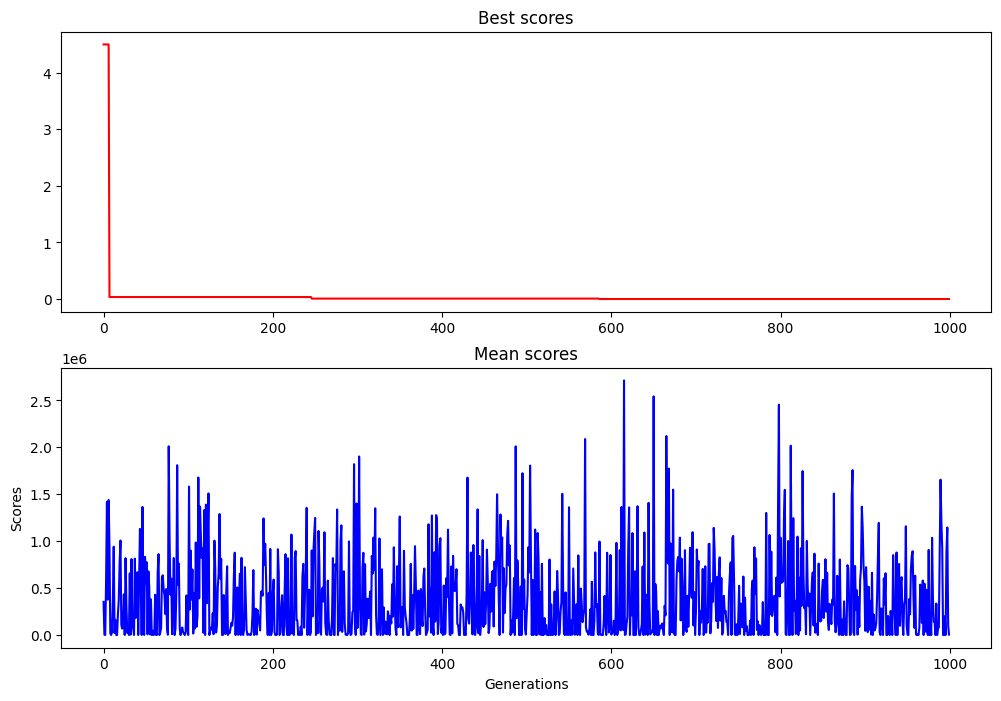

In [95]:
plot_scores(best_scores, mean_scores)

In [96]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.015558741099667168
Best solution: [ 3.56942018 -1.82794185]
Simulating generation 200. This generation info:
Lowest score: 0.008038585628141803
Best solution: [ 3.57656623 -1.82794185]
Simulating generation 300. This generation info:
Lowest score: 0.003375476420316585
Best solution: [ 3.57656623 -1.84261028]
Simulating generation 400. This generation info:
Lowest score: 0.0012026026984088838
Best solution: [ 3.58023955 -1.84261028]
Simulating generation 500. This generation info:
Lowest score: 0.0007846718972992237
Best solution: [ 3.58148842 -1.84261028]
Simulating generation 600. This generation info:
Lowest score: 0.0007846718972992237
Best solution: [ 3.58148842 -1.84261028]
Simulating generation 700. This generation info:
Lowest score: 0.0007846718972992237
Best solution: [ 3.58148842 -1.84261028]
Simulating generation 800. This generation info:
Lowest score: 0.0007846718972992237
Best solution: [ 3.58148842 -1.84261

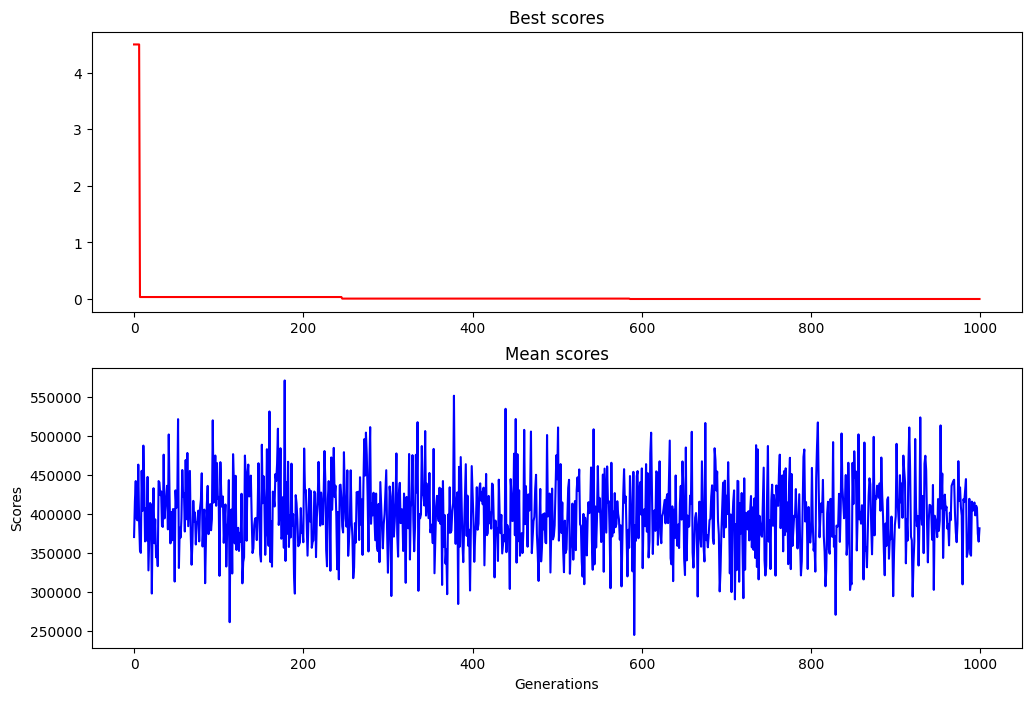

In [97]:
plot_scores(best_scores, mean_scores)

#### Different `max_iter`

In [99]:
base_lenght = 1000
max_iter = 10000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 1000. This generation info:
Lowest score: 0.08557905835958186
Best solution: [-3.81723305 -3.30842068]
Simulating generation 2000. This generation info:
Lowest score: 0.029787506110442875
Best solution: [-3.79336992 -3.30842068]
Simulating generation 3000. This generation info:
Lowest score: 0.029787506110442875
Best solution: [-3.79336992 -3.30842068]
Simulating generation 4000. This generation info:
Lowest score: 0.029787506110442875
Best solution: [-3.79336992 -3.30842068]
Simulating generation 5000. This generation info:
Lowest score: 0.014573690799396804
Best solution: [-3.79336992 -3.29710141]
Simulating generation 6000. This generation info:
Lowest score: 0.014573690799396804
Best solution: [-3.79336992 -3.29710141]
Simulating generation 7000. This generation info:
Lowest score: 0.010838526726611456
Best solution: [-3.77559853 -3.29710141]
Simulating generation 8000. This generation info:
Lowest score: 0.006919727474218216
Best solution: [-3.77559853 -3.270

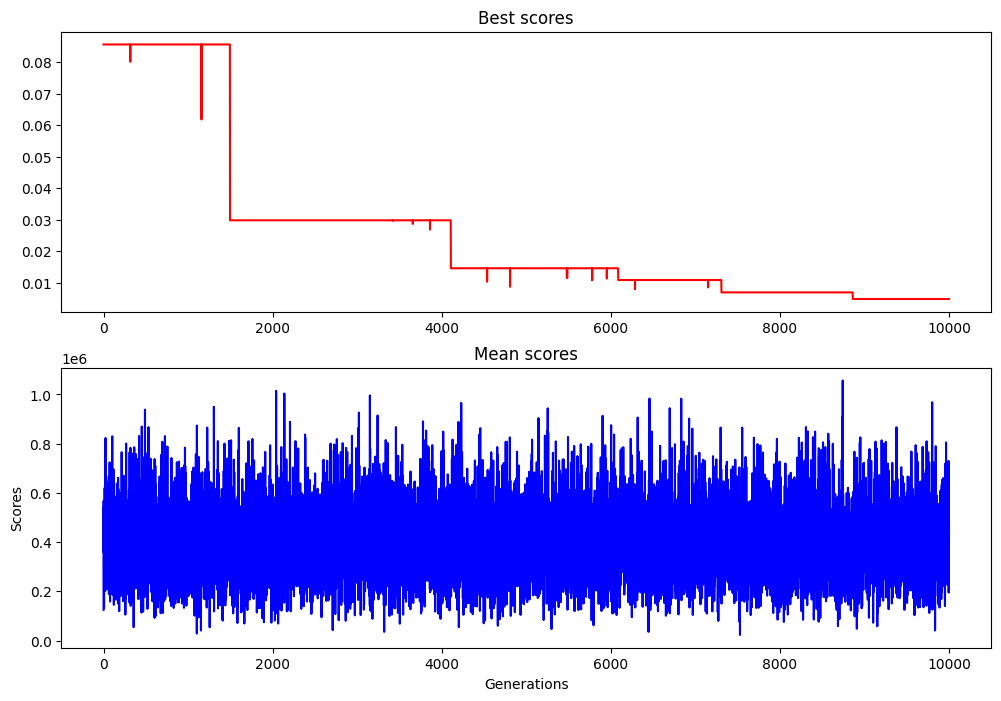

In [100]:
plot_scores(best_scores, mean_scores)

In [101]:
base_lenght = 1000
max_iter = 100
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 10. This generation info:
Lowest score: 14.825318871530687
Best solution: [-2.03399962  3.19419984]
Simulating generation 20. This generation info:
Lowest score: 8.373852280244158
Best solution: [-2.25225475  3.19419984]
Simulating generation 30. This generation info:
Lowest score: 8.373852280244158
Best solution: [-2.25225475  3.19419984]
Simulating generation 40. This generation info:
Lowest score: 8.373852280244158
Best solution: [-2.25225475  3.19419984]
Simulating generation 50. This generation info:
Lowest score: 3.479786643408242
Best solution: [-2.4680417   3.19419984]
Simulating generation 60. This generation info:
Lowest score: 0.16289204189902687
Best solution: [-2.80167184  3.19419984]
Simulating generation 70. This generation info:
Lowest score: 0.16289204189902687
Best solution: [-2.80167184  3.19419984]
Simulating generation 80. This generation info:
Lowest score: 0.16289204189902687
Best solution: [-2.80167184  3.19419984]
Simulating generation 90.

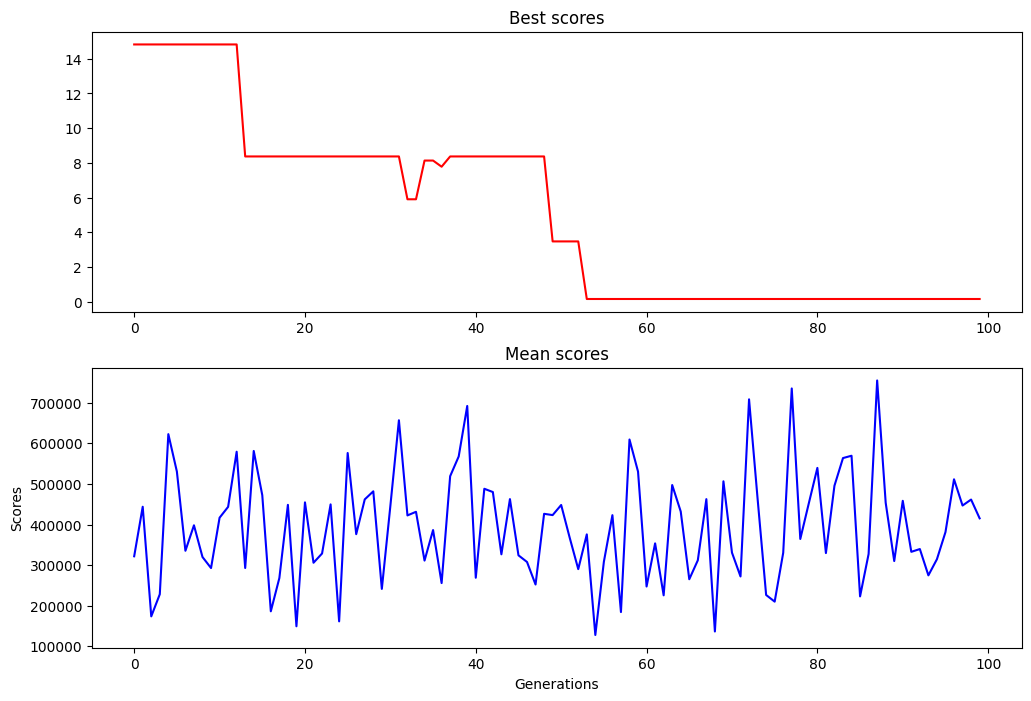

In [102]:
plot_scores(best_scores, mean_scores)

#### Different `pm` - probability of mutation

In [111]:
base_lenght = 1000
max_iter = 1000
pm = 0.5
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.008122111703019446
Best solution: [ 3.58519547 -1.87165835]
Simulating generation 200. This generation info:
Lowest score: 0.00030204153729996897
Best solution: [ 3.58519547 -1.84399974]
Simulating generation 300. This generation info:
Lowest score: 0.00019037429693314186
Best solution: [ 3.58519547 -1.84500249]
Simulating generation 400. This generation info:
Lowest score: 8.831272343167709e-05
Best solution: [ 3.58519547 -1.84631941]
Simulating generation 500. This generation info:
Lowest score: 8.831272343167709e-05
Best solution: [ 3.58519547 -1.84631941]
Simulating generation 600. This generation info:
Lowest score: 8.831272343167709e-05
Best solution: [ 3.58519547 -1.84631941]
Simulating generation 700. This generation info:
Lowest score: 1.3265320869956267e-05
Best solution: [ 3.584019  -1.8474678]
Simulating generation 800. This generation info:
Lowest score: 1.3265320869956267e-05
Best solution: [ 3.584019  -1.84

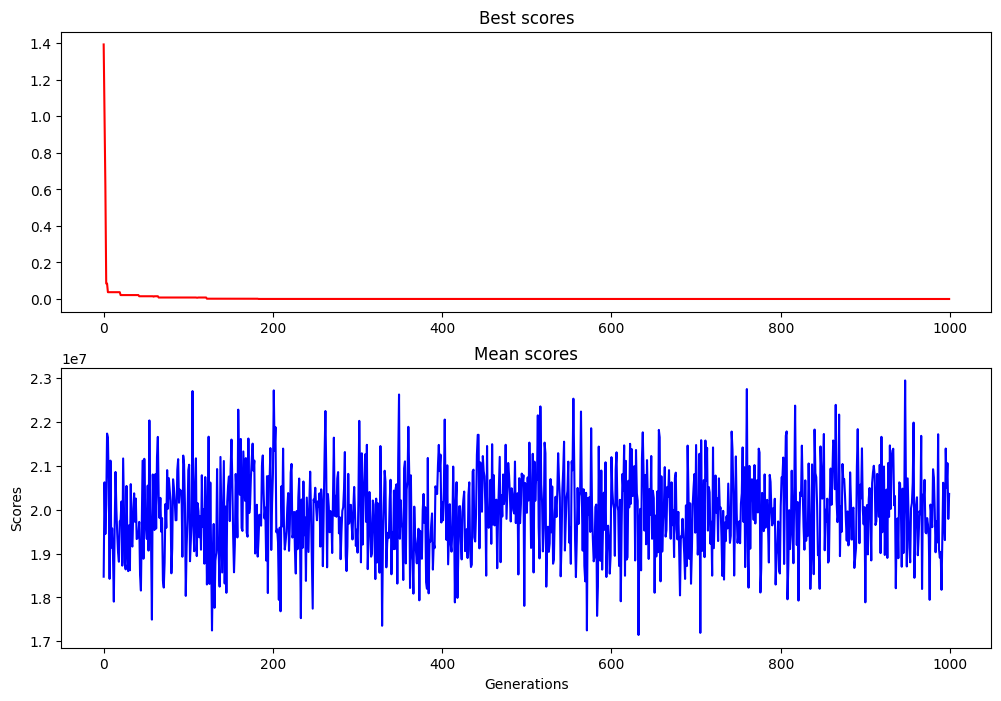

In [112]:
plot_scores(best_scores, mean_scores)

In [105]:
base_lenght = 1000
max_iter = 1000
pm = 0.0001
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 200. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 300. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 400. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 500. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 600. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 700. This generation info:
Lowest score: 13.696611744501237
Best solution: [-2.09693945  2.93419328]
Simulating generation 800. This generation info:
Lowest score: 2.3846635028056533
Best solution: [-2.96684689  2.93419328]
Simulating gener

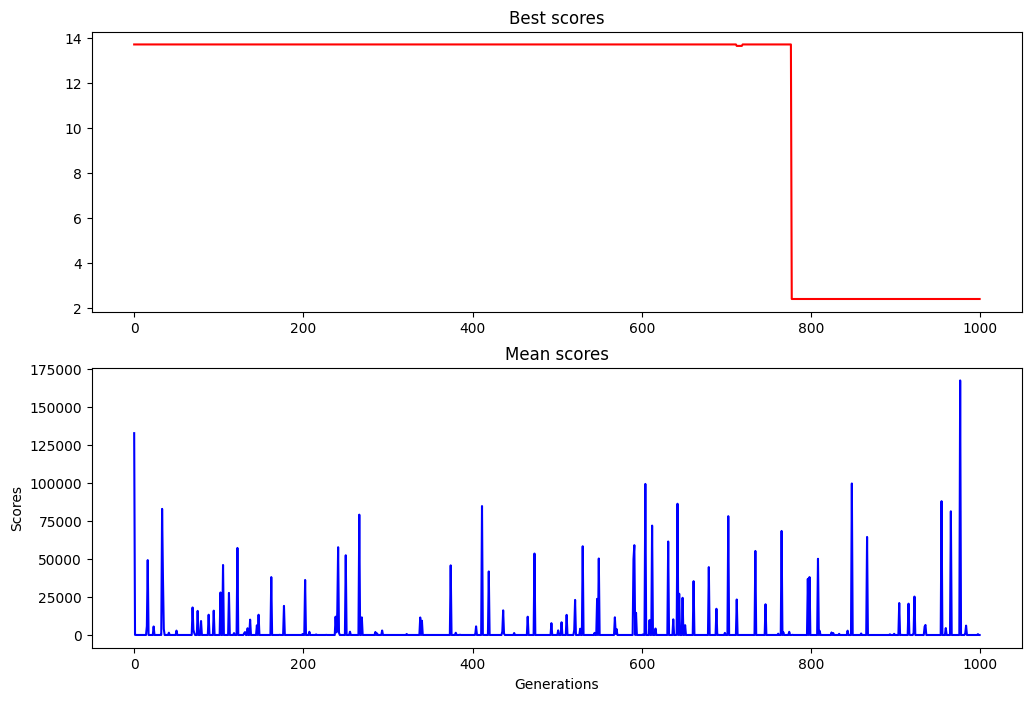

In [106]:
plot_scores(best_scores, mean_scores)

#### Different `pc` - probability of crossover

In [107]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 1

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1.8910649125091155
Best solution: [-3.59434387 -3.16371566]
Simulating generation 200. This generation info:
Lowest score: 1.0735011904481437
Best solution: [-3.87910275 -3.42118662]
Simulating generation 300. This generation info:
Lowest score: 1.0735011904481437
Best solution: [-3.87910275 -3.42118662]
Simulating generation 400. This generation info:
Lowest score: 0.551462725582272
Best solution: [-3.87910275 -3.32301283]
Simulating generation 500. This generation info:
Lowest score: 0.10608618456778615
Best solution: [-3.81529435 -3.32301283]
Simulating generation 600. This generation info:
Lowest score: 0.10608618456778615
Best solution: [-3.81529435 -3.32301283]
Simulating generation 700. This generation info:
Lowest score: 0.10608618456778615
Best solution: [-3.81529435 -3.32301283]
Simulating generation 800. This generation info:
Lowest score: 0.10608618456778615
Best solution: [-3.81529435 -3.32301283]
Simulating ge

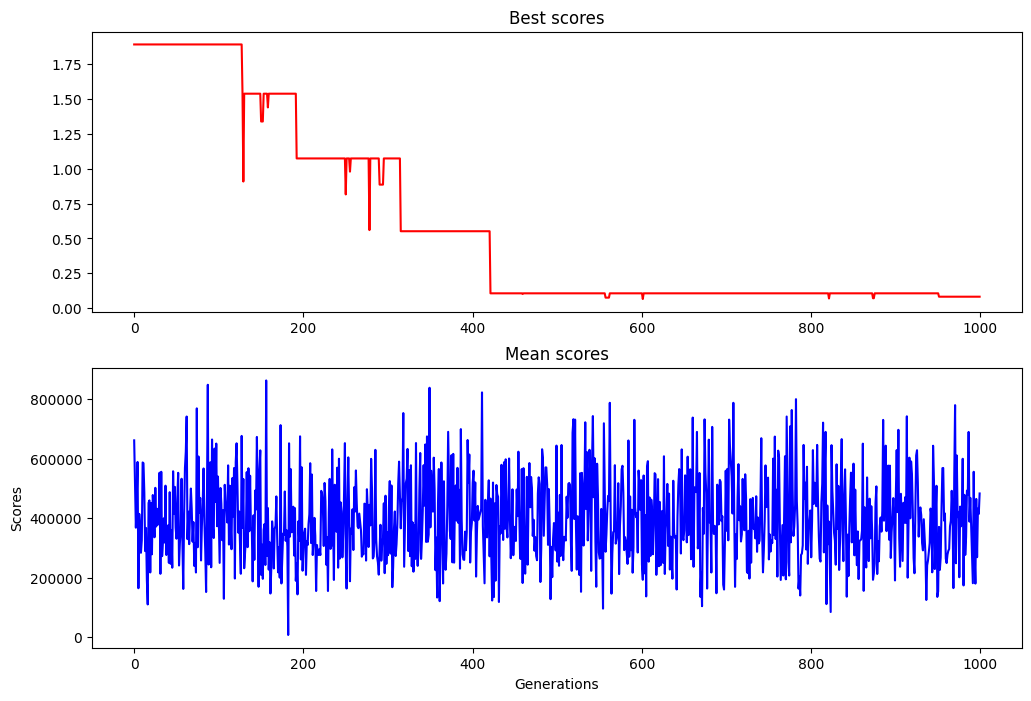

In [108]:
plot_scores(best_scores, mean_scores)

In [109]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.01

solutions, best_scores, mean_scores = evolutionary_algorithm(himmelblau, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1.6128799335661508
Best solution: [3.21540531 1.92970254]
Simulating generation 200. This generation info:
Lowest score: 0.25981493855263516
Best solution: [2.92631682 2.1137872 ]
Simulating generation 300. This generation info:
Lowest score: 0.25981493855263516
Best solution: [2.92631682 2.1137872 ]
Simulating generation 400. This generation info:
Lowest score: 0.25981493855263516
Best solution: [2.92631682 2.1137872 ]
Simulating generation 500. This generation info:
Lowest score: 0.21168895211111532
Best solution: [2.94777779 2.1137872 ]
Simulating generation 600. This generation info:
Lowest score: 0.21168895211111532
Best solution: [2.94777779 2.1137872 ]
Simulating generation 700. This generation info:
Lowest score: 0.08691086040210588
Best solution: [2.94777779 2.04405666]
Simulating generation 800. This generation info:
Lowest score: 0.08691086040210588
Best solution: [2.94777779 2.04405666]
Simulating generation 900

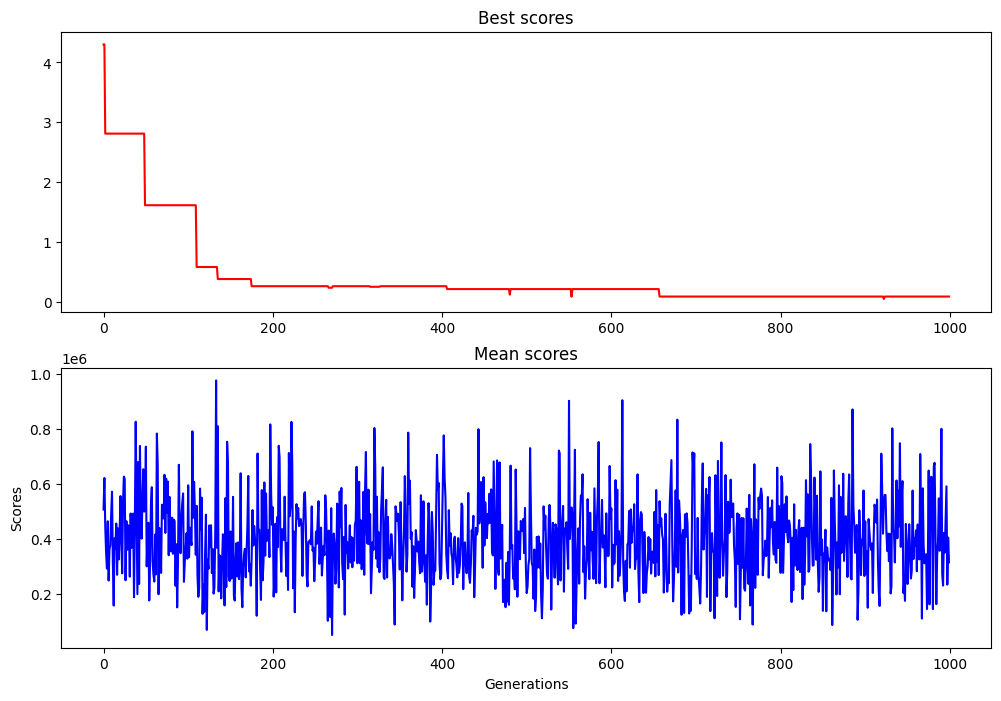

In [110]:
plot_scores(best_scores, mean_scores)

### 3.2 Ackley's function

#### Default parameters

In [113]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.7445115513129221
Best solution: [-0.03628666 -0.12233324]
Simulating generation 200. This generation info:
Lowest score: 0.3444784054071808
Best solution: [-0.03628666  0.0635717 ]
Simulating generation 300. This generation info:
Lowest score: 0.25800999333132824
Best solution: [-0.03628666  0.04664578]
Simulating generation 400. This generation info:
Lowest score: 0.25800999333132824
Best solution: [-0.03628666  0.04664578]
Simulating generation 500. This generation info:
Lowest score: 0.25800999333132824
Best solution: [-0.03628666  0.04664578]
Simulating generation 600. This generation info:
Lowest score: 0.25800999333132824
Best solution: [-0.03628666  0.04664578]
Simulating generation 700. This generation info:
Lowest score: 0.25800999333132824
Best solution: [-0.03628666  0.04664578]
Simulating generation 800. This generation info:
Lowest score: 0.1418822642981863
Best solution: [-0.03628666 -0.00839744]
Simulating 

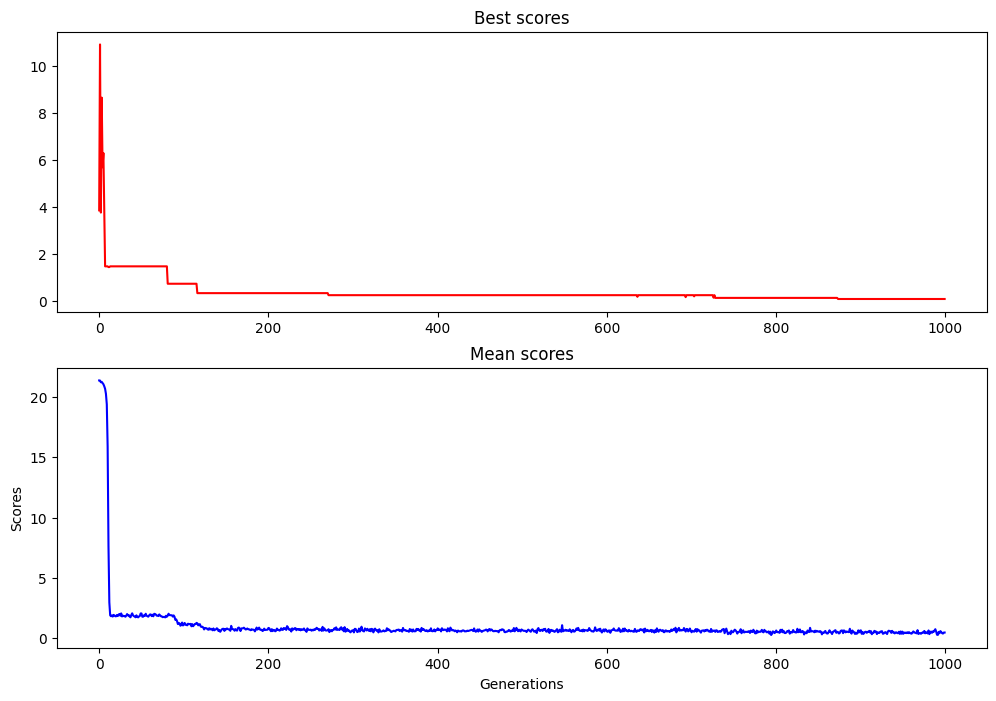

In [114]:
plot_scores(best_scores, mean_scores)

#### Different `base_length`

In [117]:
base_lenght = 10000
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 0.12061606622063126
Best solution: [0.02691396 0.01851789]
Simulating generation 200. This generation info:
Lowest score: 0.06989805270751193
Best solution: [0.00923645 0.01851789]
Simulating generation 300. This generation info:
Lowest score: 0.029471382142542968
Best solution: [ 0.00923645 -0.00246575]
Simulating generation 400. This generation info:
Lowest score: 0.029471382142542968
Best solution: [ 0.00923645 -0.00246575]
Simulating generation 500. This generation info:
Lowest score: 0.029471382142542968
Best solution: [ 0.00923645 -0.00246575]
Simulating generation 600. This generation info:
Lowest score: 0.029471382142542968
Best solution: [ 0.00923645 -0.00246575]
Simulating generation 700. This generation info:
Lowest score: 0.029471382142542968
Best solution: [ 0.00923645 -0.00246575]
Simulating generation 800. This generation info:
Lowest score: 0.007262032245670458
Best solution: [-0.00045996 -0.00246575]
Simula

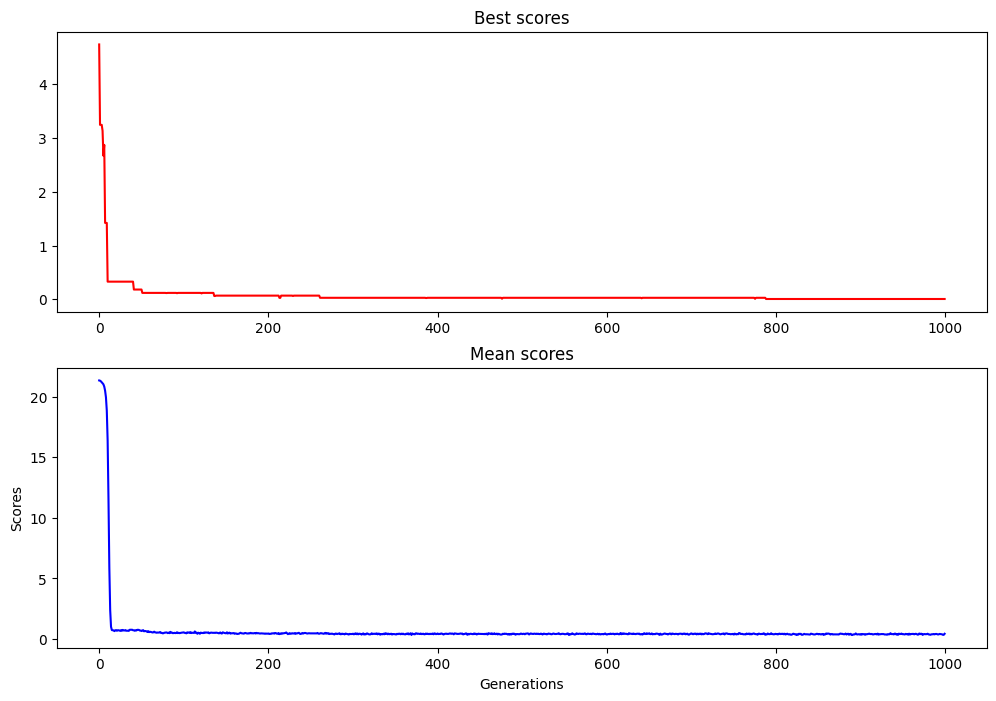

In [118]:
plot_scores(best_scores, mean_scores)

In [120]:
base_lenght = 100
max_iter = 1000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 19.59802314931378
Best solution: [-12.96335738  14.79701668]
Simulating generation 200. This generation info:
Lowest score: 19.665280613572424
Best solution: [ 6.29847666 14.79701668]
Simulating generation 300. This generation info:
Lowest score: 17.45352211370875
Best solution: [-10.84045488   5.18238403]
Simulating generation 400. This generation info:
Lowest score: 5.7624660193347985
Best solution: [1.75647055 0.15005127]
Simulating generation 500. This generation info:
Lowest score: 5.7624660193347985
Best solution: [1.75647055 0.15005127]
Simulating generation 600. This generation info:
Lowest score: 2.467094148833102
Best solution: [0.29517948 0.15005127]
Simulating generation 700. This generation info:
Lowest score: 0.942105964279325
Best solution: [-0.02245576  0.15005127]
Simulating generation 800. This generation info:
Lowest score: 0.942105964279325
Best solution: [-0.02245576  0.15005127]
Simulating generation 9

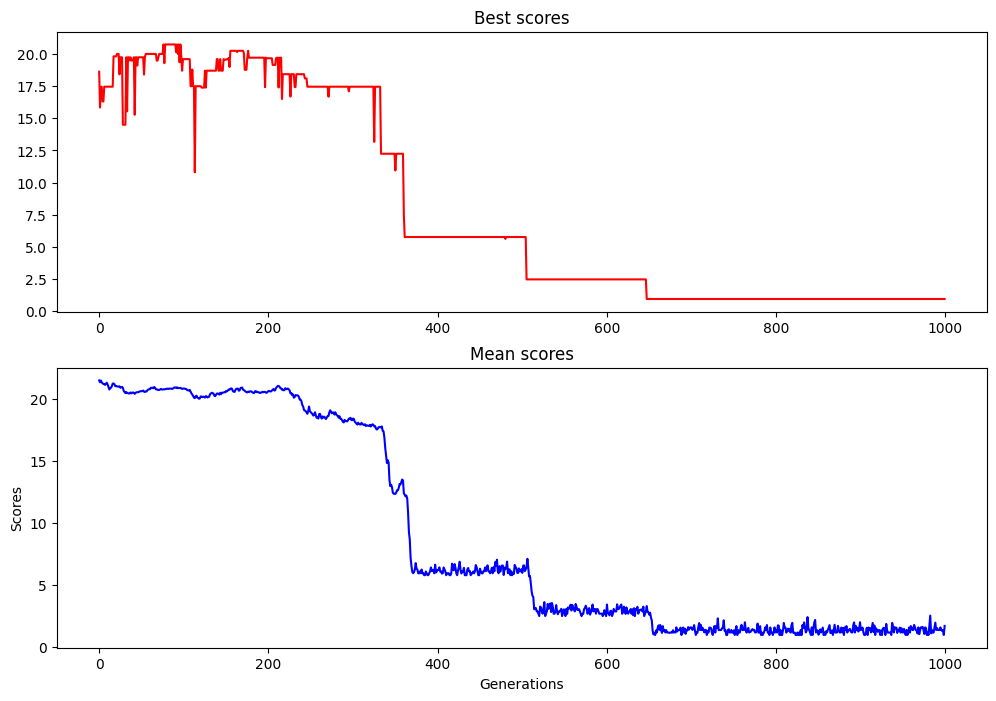

In [121]:
plot_scores(best_scores, mean_scores)

#### Different `max_iter`

In [123]:
base_lenght = 1000
max_iter = 10000
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 1000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 2000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 3000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 4000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 5000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 6000. This generation info:
Lowest score: 0.027572204047669135
Best solution: [ 0.00736901 -0.00514623]
Simulating generation 7000. This generation info:
Lowest score: 0.002659678296528245
Best solution: [0.00079796 0.00048184]
Simulating generation 8000. This generation info:
Lowest score: 0.002659678296528245
Best solution: [0.00079796 0.000481

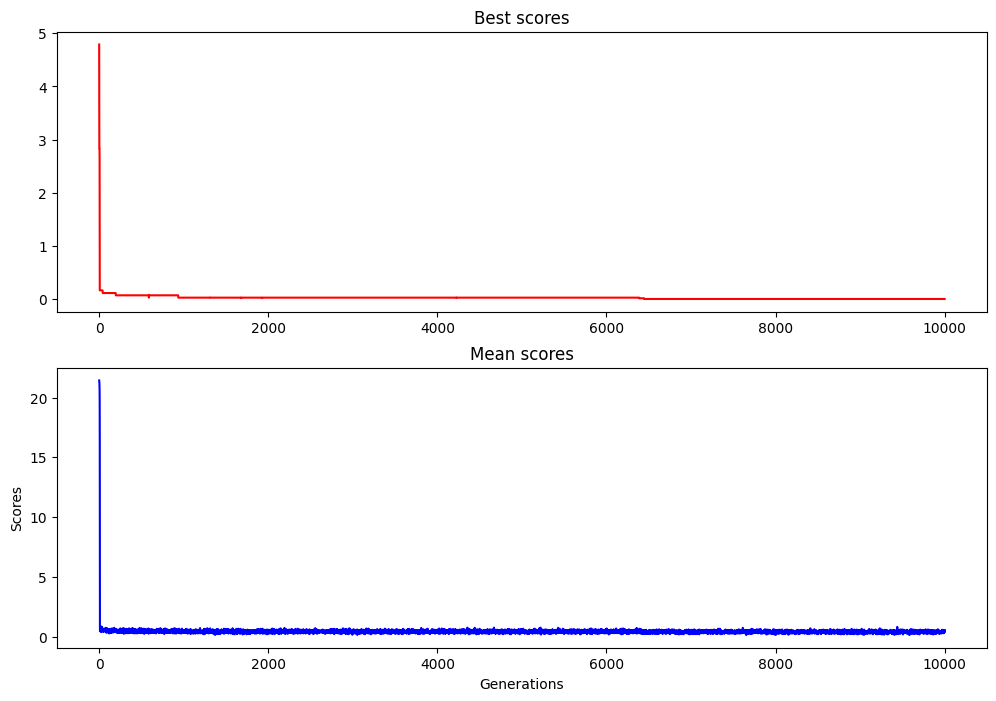

In [124]:
plot_scores(best_scores, mean_scores)

In [125]:
base_lenght = 1000
max_iter = 100
pm = 0.01
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 10. This generation info:
Lowest score: 2.3194366862523883
Best solution: [-0.0518115  -0.32047273]
Simulating generation 20. This generation info:
Lowest score: 0.5165566208638315
Best solution: [-0.0518115  -0.08315948]
Simulating generation 30. This generation info:
Lowest score: 0.5165566208638315
Best solution: [-0.0518115  -0.08315948]
Simulating generation 40. This generation info:
Lowest score: 0.5165566208638315
Best solution: [-0.0518115  -0.08315948]
Simulating generation 50. This generation info:
Lowest score: 0.40952808255273654
Best solution: [ 0.00250776 -0.08315948]
Simulating generation 60. This generation info:
Lowest score: 0.40952808255273654
Best solution: [ 0.00250776 -0.08315948]
Simulating generation 70. This generation info:
Lowest score: 0.08384969743924886
Best solution: [ 0.00250776 -0.02404075]
Simulating generation 80. This generation info:
Lowest score: 0.08384969743924886
Best solution: [ 0.00250776 -0.02404075]
Simulating generatio

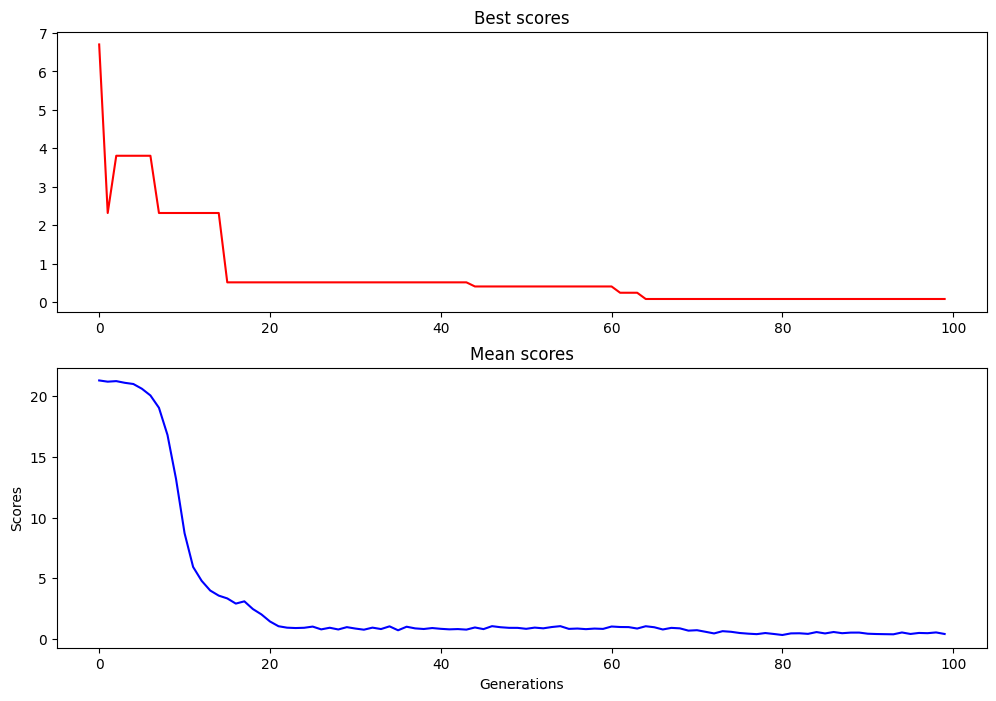

In [126]:
plot_scores(best_scores, mean_scores)

#### Different `pm`

In [127]:
base_lenght = 1000
max_iter = 1000
pm = 0.5
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 3.6689195354733184
Best solution: [0.21564937 0.77224548]
Simulating generation 200. This generation info:
Lowest score: 0.06116088760276073
Best solution: [-0.01759549 -0.00549359]
Simulating generation 300. This generation info:
Lowest score: 0.023575136743872793
Best solution: [-0.00549103 -0.00549359]
Simulating generation 400. This generation info:
Lowest score: 0.023575136743872793
Best solution: [-0.00549103 -0.00549359]
Simulating generation 500. This generation info:
Lowest score: 0.01632067693937289
Best solution: [-0.00453505  0.00308851]
Simulating generation 600. This generation info:
Lowest score: 0.010380222965523433
Best solution: [-0.00175283  0.00308851]
Simulating generation 700. This generation info:
Lowest score: 0.008995589201199028
Best solution: [0.00011104 0.00308851]
Simulating generation 800. This generation info:
Lowest score: 0.001092204570430244
Best solution: [ 0.00011104 -0.00036839]
Simulati

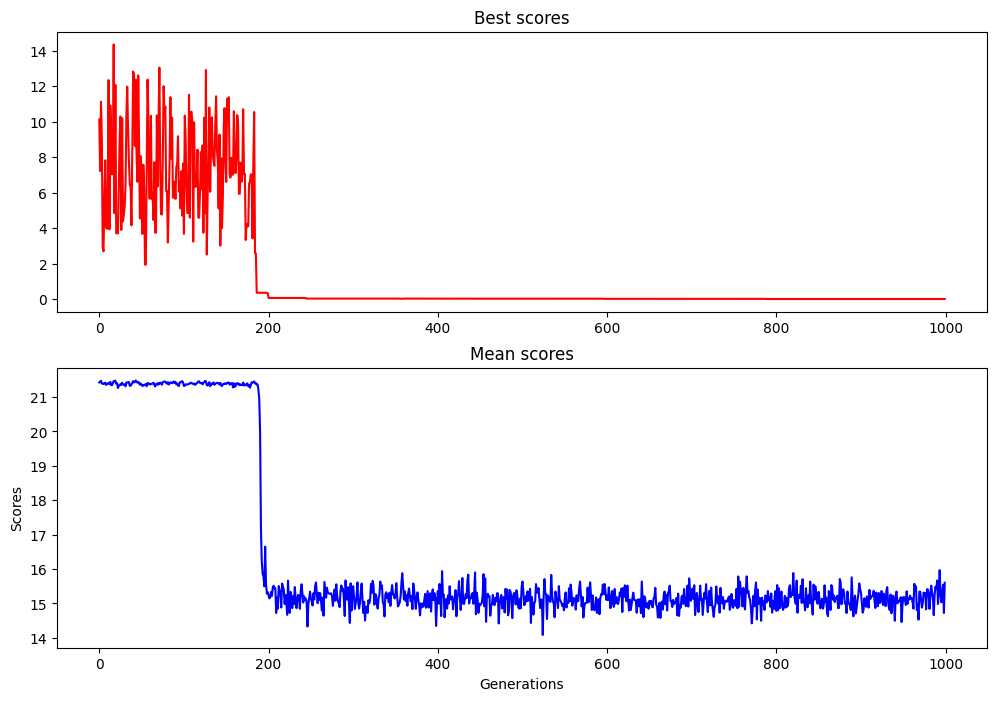

In [128]:
plot_scores(best_scores, mean_scores)

In [129]:
base_lenght = 1000
max_iter = 1000
pm = 0.001
pc = 0.9

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 200. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 300. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 400. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 500. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 600. This generation info:
Lowest score: 3.155018833077151
Best solution: [0.49882286 0.07874922]
Simulating generation 700. This generation info:
Lowest score: 0.5881049592814773
Best solution: [0.07290983 0.07874922]
Simulating generation 800. This generation info:
Lowest score: 0.5881049592814773
Best solution: [0.07290983 0.07874922]
Simulating generation 900. This genera

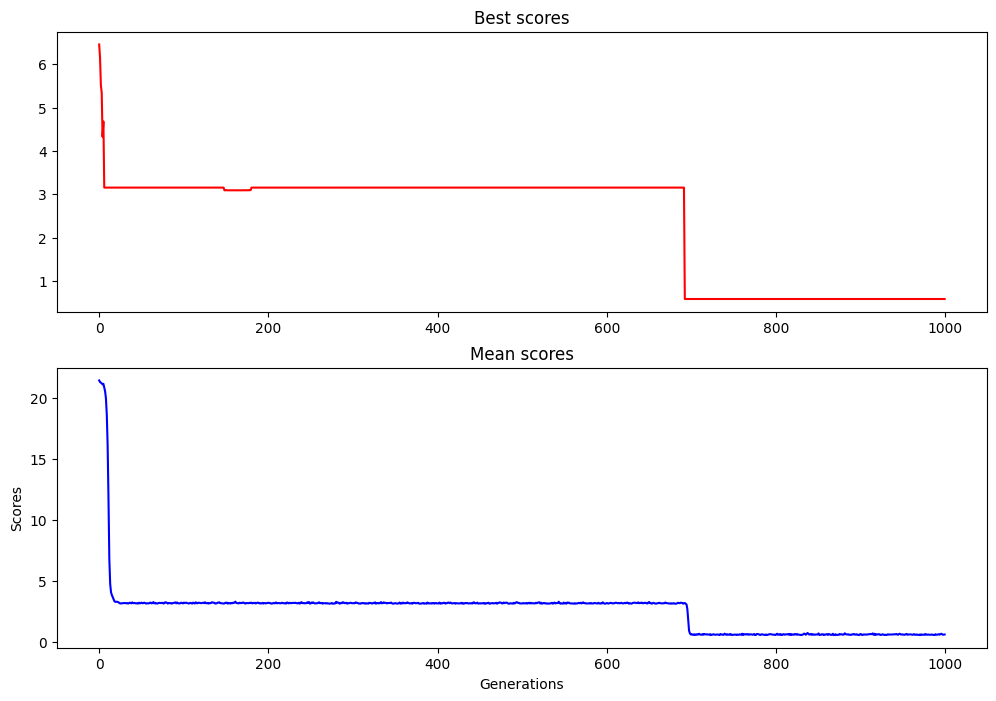

In [130]:
plot_scores(best_scores, mean_scores)

#### Different `pc`

In [131]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 1

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 1.1473544426824742
Best solution: [ 0.14399854 -0.096266  ]
Simulating generation 200. This generation info:
Lowest score: 0.08950751212129804
Best solution: [-0.00365977 -0.02527446]
Simulating generation 300. This generation info:
Lowest score: 0.08950751212129804
Best solution: [-0.00365977 -0.02527446]
Simulating generation 400. This generation info:
Lowest score: 0.029706717827022278
Best solution: [-0.00365977 -0.00890787]
Simulating generation 500. This generation info:
Lowest score: 0.029706717827022278
Best solution: [-0.00365977 -0.00890787]
Simulating generation 600. This generation info:
Lowest score: 0.029706717827022278
Best solution: [-0.00365977 -0.00890787]
Simulating generation 700. This generation info:
Lowest score: 0.029706717827022278
Best solution: [-0.00365977 -0.00890787]
Simulating generation 800. This generation info:
Lowest score: 0.029706717827022278
Best solution: [-0.00365977 -0.00890787]
Simu

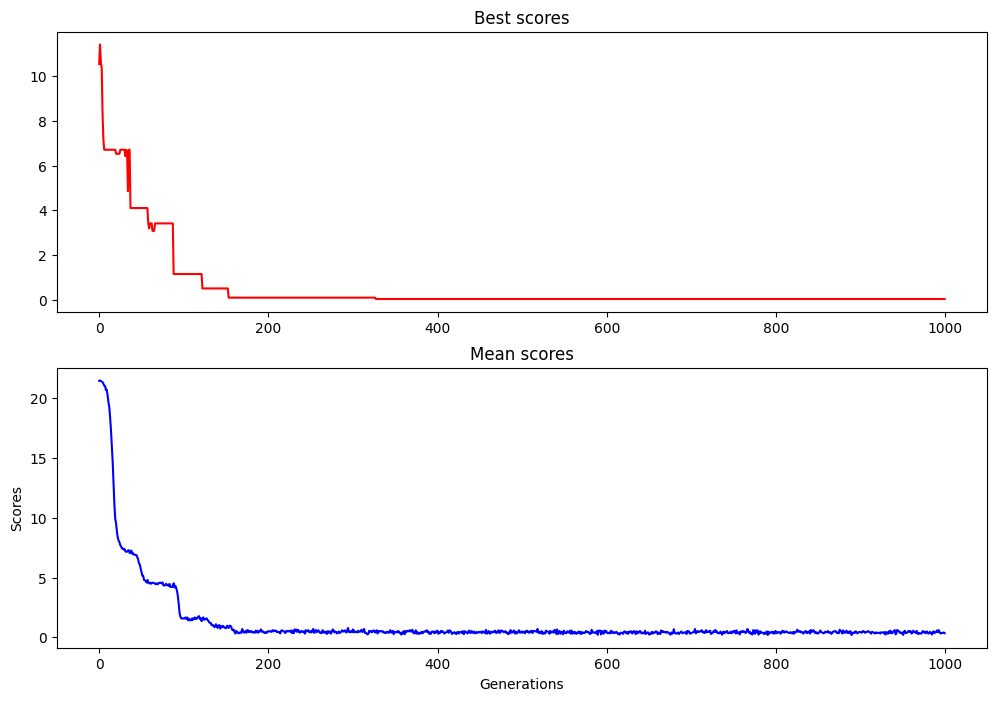

In [132]:
plot_scores(best_scores, mean_scores)

In [133]:
base_lenght = 1000
max_iter = 1000
pm = 0.01
pc = 0.01

solutions, best_scores, mean_scores = evolutionary_algorithm(ackley, base_lenght, max_iter, pm, pc)

Simulating generation 100. This generation info:
Lowest score: 3.618737754555156
Best solution: [0.9420685  0.93351166]
Simulating generation 200. This generation info:
Lowest score: 1.4144303493513317
Best solution: [0.09632196 0.17915968]
Simulating generation 300. This generation info:
Lowest score: 0.5248603864812336
Best solution: [ 0.09632196 -0.02452793]
Simulating generation 400. This generation info:
Lowest score: 0.12273180444050924
Best solution: [ 0.02227395 -0.02452793]
Simulating generation 500. This generation info:
Lowest score: 0.12273180444050924
Best solution: [ 0.02227395 -0.02452793]
Simulating generation 600. This generation info:
Lowest score: 0.12273180444050924
Best solution: [ 0.02227395 -0.02452793]
Simulating generation 700. This generation info:
Lowest score: 0.12273180444050924
Best solution: [ 0.02227395 -0.02452793]
Simulating generation 800. This generation info:
Lowest score: 0.12273180444050924
Best solution: [ 0.02227395 -0.02452793]
Simulating gener

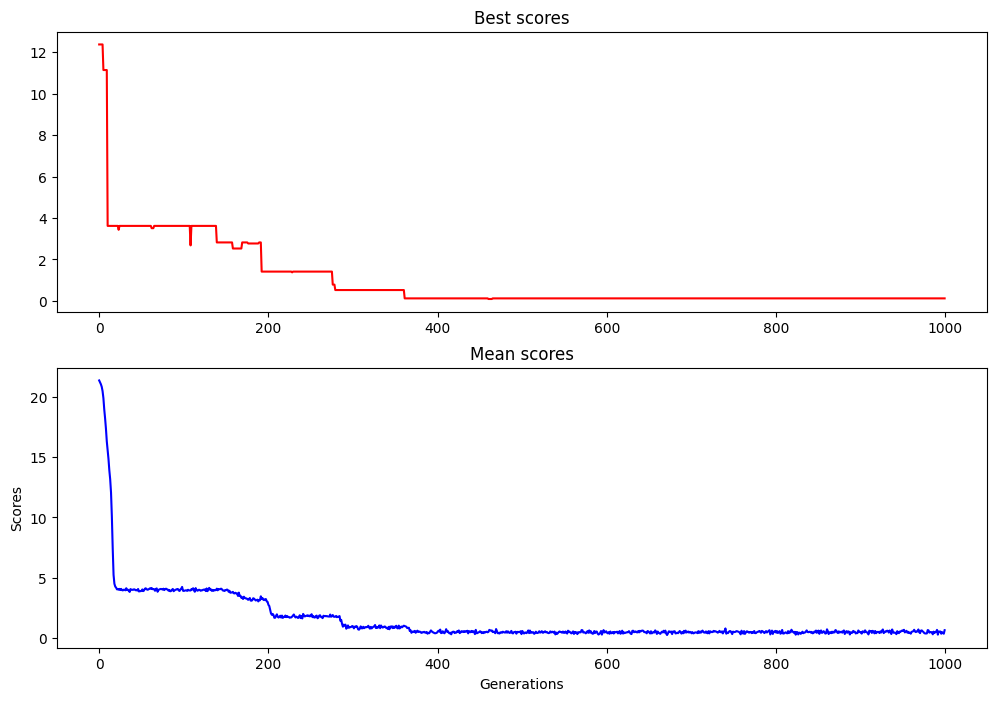

In [134]:
plot_scores(best_scores, mean_scores)

## 4. Conclusions

Evolutionary algorithm is better at finding global minimmum of a given function than simple gradient. However the solution it gives, highly depends on starting parameters:
- `base_lenght`: Base population length. The larger it is the slower algorithm works but it has higher chances for a better solutions. It needs to be picked adequatly for amount of computation we have at our disposal and how precise solution we expect.
- `max_iter`: The maximum amount of iterations algorithm can achieve. Similarly to `base_length` the bigger it is the slower algorithm works. However, in my implementation, the limit of iterations is rarely hit because of additional stop condition.
- `pm`: Probability of mutation. It indicates how often a gen is mutated. It has to be quite close to 0 because mutations can highly impact the output data. If it is too large the solution could be a random number and algorithm is most likely to end due to max iterations limit.
- `pc`: Probability of crossover. Similarly, it tells how often crossover is performed. However this can, and should, be closer to 1 than 0, because it positively affects a search for solution. It could even be ecqual to 1 so crossover happens everytime.

Interestingly for himmelblau's function, the larger `pm` parameter gets, the better results we get. It could be caused due to how this function looks in space.